In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append(r"C:\Users\DGaard\Desktop\Gits\MoleculeSim\ownSim")

import forces as fc
import molecules as mc
import img3dto2d as i32
import random

In [2]:
points = [
    np.array([50, 50, 50]),
    np.array([10, 50, 50]),
    np.array([50, 10, 50])
]
points2d = np.array(points)[:,:2]
radii = np.array([10,10,10])

p2dr = list(zip(points2d,radii))

print(points2d)
print(p2dr)


size = 100
img_size = (size,size)




[[50 50]
 [10 50]
 [50 10]]
[(array([50, 50]), 10), (array([10, 50]), 10), (array([50, 10]), 10)]


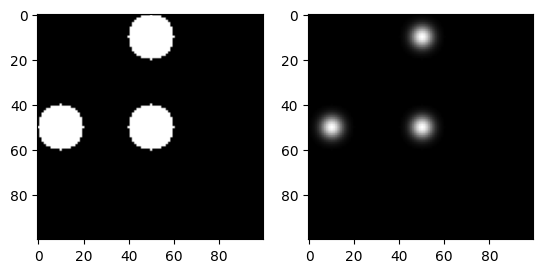

In [3]:
def plot_sphere(img, x, y, radius):
    for i in range(max(0, int(x - radius)), min(img.shape[1], int(x + radius + 1))):
        for j in range(max(0, int(y - radius)), min(img.shape[0], int(y + radius + 1))):
            if (i - x)**2 + (j - y)**2 <= radius**2:
                img[i, j] = 1

def gaussian(x, y, x0, y0, sigma):
    return np.exp(-((x - x0)**2 + (y - y0)**2) / (2 * sigma**2))

def plot_sphere_gauss(img, x, y, radius,sigma):
    for i in range(max(0, int(x - radius)), min(img.shape[1], int(x + radius + 1))):
        for j in range(max(0, int(y - radius)), min(img.shape[0], int(y + radius + 1))):
            if (i - x)**2 + (j - y)**2 <= radius**2:
                img[i, j] += gaussian(i, j, x, y, sigma)

img = np.zeros(img_size)
img_gauss = np.zeros(img_size)
sigma_scale = 3

for i,((x,y),r) in enumerate(p2dr):
  plot_sphere(img,x,y,r)

for i,((x,y),r) in enumerate(p2dr):
  plot_sphere_gauss(img_gauss,x,y,r,r/sigma_scale)

plt.subplot(1,2,1)
plt.imshow(img,cmap="gray")
plt.subplot(1,2,2)
plt.imshow(img_gauss,cmap="gray")
plt.show()

<class 'numpy.ndarray'> (100, 100)


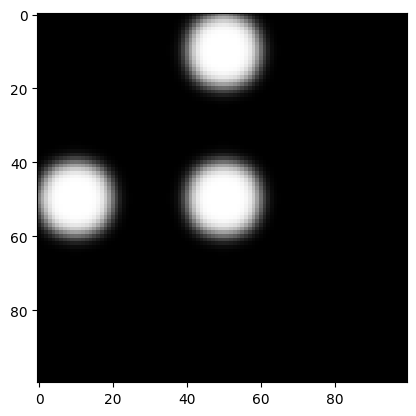

In [4]:
#gauss hardfill:
#def gauss2d(img,sigma):
#  return gaussian(img,sigma)

from skimage.filters import gaussian
_gauss_img = gaussian(img,2)
_gauss_img2 = i32.gauss2dimg(img,2)

#plt.imshow(_gauss_img,cmap="gray")
plt.imshow(_gauss_img2,cmap="gray")

In [5]:
#define universe
box_const_size = 10000
box_size = np.array([box_const_size,box_const_size,box_const_size]) #max coordinate values for universe
num_molecules = 20
num_steps = 1000
radius  = 100
radii = [radius for _ in range(num_molecules)]

#other setup
seed = 1313

uni = mc.SimpleUniverse(box_size,num_molecules,radii,seed,own_molecules=None)


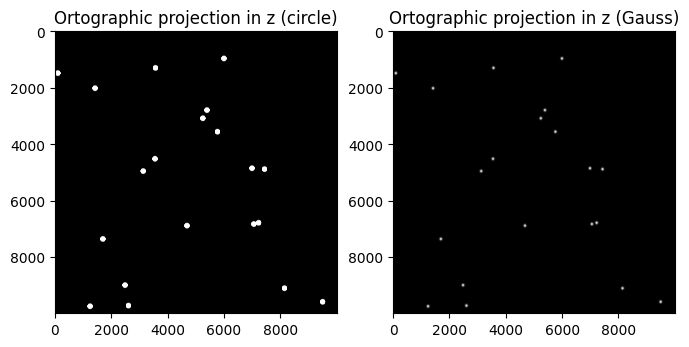

In [6]:
img_size = (10000,10000)

pd2r_2 = i32.get_points2d(uni) 
img2 = i32.get_3d_to_2d_img(pd2r_2,img_size)
img_gauss2 = i32.get_3d_to_2d_img_gauss(pd2r_2,img_size,3)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.title("Ortographic projection in z (circle)")
plt.imshow(img2,cmap="gray")
plt.subplot(1,2,2)
plt.title("Ortographic projection in z (Gauss)")
plt.imshow(img_gauss2,cmap="gray")
plt.show()

In [7]:
points = [
    np.array([50, 50, 50]),
    np.array([10, 50, 50]),
    np.array([50, 10, 50])
]
points2d = np.array(points)[:,:2]
radii = np.array([10,10,10])

p2dr = list(zip(points2d,radii))

print(points2d)
print(p2dr)


size = 100
img_size = (size,size)




[[50 50]
 [10 50]
 [50 10]]
[(array([50, 50]), 10), (array([10, 50]), 10), (array([50, 10]), 10)]


In [8]:
#define universe
box_const_size = 10000
box_size = np.array([box_const_size,box_const_size,box_const_size]) #max coordinate values for universe
num_molecules = 20
num_steps = 1000
radius  = 100
radii = [radius for _ in range(num_molecules)]

#other setup
seed = 1313

uni = mc.SimpleUniverse(box_size,num_molecules,radii,seed,own_molecules=None)


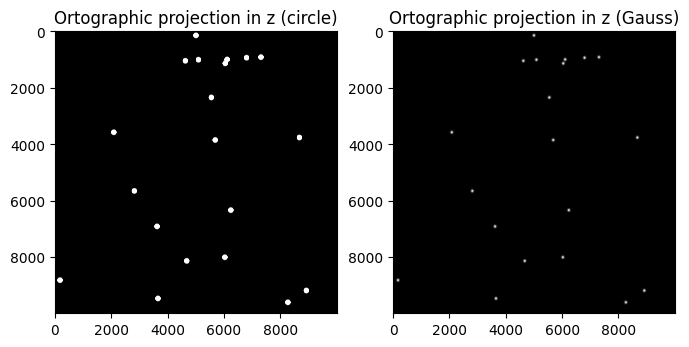

In [9]:
i32.plot_universe_in_2d(uni)